In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [30]:
df = pd.read_csv('/ExamExercises/Datasets/loan_data_v3.csv')

In [31]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [32]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [33]:
df.drop(columns=["Unnamed: 0"], inplace=True)

<Axes: xlabel='loan_status'>

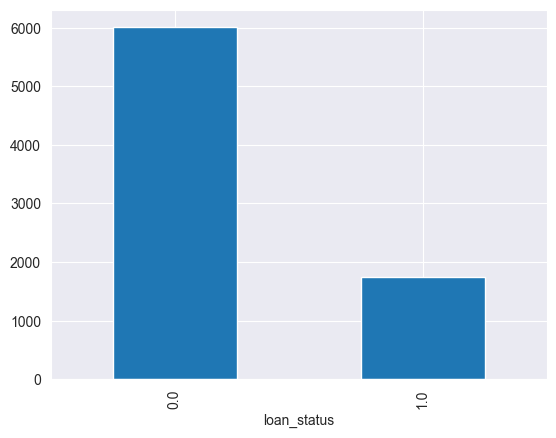

In [34]:
df["loan_status"].value_counts().plot.bar()

In [35]:
imputer = SimpleImputer(strategy="median")

In [36]:
df[["person_age"]] = imputer.fit_transform(df[["person_age"]])

In [37]:
df["person_gender"] = df["person_gender"].map({"male": 0, "female": 1})

In [38]:
df["person_education"].unique()

array(['Associate', 'Bachelor', 'High School', 'Master', nan, 'Doctorate'],
      dtype=object)

In [39]:
classes = ["High School", "Associate", "Bachelor", "Master", "Doctorate", np.nan]
ordinal_encoder = OrdinalEncoder(categories=[classes])

In [40]:
df[["person_education"]] = ordinal_encoder.fit_transform(df[["person_education"]])

In [41]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,0.0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,1.0,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,1.0,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,1.0,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,1.0,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [43]:
imputer = SimpleImputer(strategy="median")
df[["loan_amnt"]] = imputer.fit_transform(df[["loan_amnt"]])

In [44]:
df[["credit_score"]] = imputer.fit_transform(df[["credit_score"]])

In [46]:
df.dropna(subset=["loan_status"], inplace=True)

In [47]:
df.isnull().sum()

person_age                          0
person_gender                     289
person_education                  409
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
dtype: int64

In [48]:
df["person_home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [49]:
classes = ["RENT", "OTHER", "OWN", "MORTGAGE"]
ordinal_encoder = OrdinalEncoder(categories=[classes])

In [51]:
df[["person_home_ownership"]] = ordinal_encoder.fit_transform(df[["person_home_ownership"]])

In [52]:
df["loan_intent"].unique()

array(['VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION', 'MEDICAL',
       'HOMEIMPROVEMENT'], dtype=object)

In [53]:
df = pd.concat([df, pd.get_dummies(df['loan_intent'])], axis=1)

In [54]:
df.drop(columns=["loan_intent"], inplace=True)

In [55]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,26.0,0.0,1.0,43996.0,4,0.0,5000.0,10.37,0.11,4.0,675.0,No,0.0,False,False,False,False,False,True
1,22.0,1.0,2.0,115708.0,0,3.0,20000.0,7.88,0.17,3.0,635.0,No,0.0,False,True,False,False,False,False
2,25.0,1.0,0.0,57827.0,0,0.0,6000.0,11.60,0.10,4.0,589.0,Yes,0.0,False,False,False,False,True,False
3,31.0,1.0,3.0,126727.0,9,0.0,24000.0,10.27,0.19,7.0,644.0,Yes,0.0,True,False,False,False,False,False
4,33.0,1.0,1.0,120987.0,10,2.0,25000.0,12.18,0.21,10.0,644.0,Yes,0.0,False,False,False,True,False,False


In [57]:
df['previous_loan_defaults_on_file'] = df["previous_loan_defaults_on_file"].map({"No": 0, "Yes": 1})

In [58]:
df.isnull().sum()

person_age                          0
person_gender                     289
person_education                  409
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
DEBTCONSOLIDATION                   0
EDUCATION                           0
HOMEIMPROVEMENT                     0
MEDICAL                             0
PERSONAL                            0
VENTURE                             0
dtype: int64

In [59]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [60]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(scaled)

In [61]:
df = pd.DataFrame(scaler.inverse_transform(imputed), columns=df.columns)

In [62]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
DEBTCONSOLIDATION                 0
EDUCATION                         0
HOMEIMPROVEMENT                   0
MEDICAL                           0
PERSONAL                          0
VENTURE                           0
dtype: int64

In [63]:
df["person_gender"] = df["person_gender"].astype(int)
df["person_education"] = df["person_education"].astype(int)

In [64]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]

In [65]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [67]:
classifier = LogisticRegression().fit(train_X, train_y)

In [68]:
pred_y = classifier.predict(test_X)

In [69]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1196
         1.0       0.79      0.76      0.77       354

    accuracy                           0.90      1550
   macro avg       0.86      0.85      0.85      1550
weighted avg       0.90      0.90      0.90      1550

